# 🧠 Exploring Pre-trained Word2Vec (Google News 300-D)

---

## 1️⃣ Overview

The **Word2Vec Google News 300** model is a **pre-trained embedding space** containing:

- ~3 million words and phrases  
- Trained on **100 billion words** from the Google News dataset  
- Each word is represented as a **300-dimensional dense vector**

$$
\mathbf{v}_w \in \mathbb{R}^{300}
$$

These vectors capture **semantic and syntactic relationships** between words —  
for example, the model understands that:

$$
\text{king} - \text{man} + \text{woman} \approx \text{queen}
$$

and  

$$
\text{hockey} \text{ is close to } \text{sports}
$$

---

## 2️⃣ Loading the Model

We’ll use the `gensim` library to download and load the **Google News Word2Vec** model.

```python
!pip install gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api
```

In [17]:
!pip install gensim


---
## 3️⃣ Load Pre-trained Embeddings

We can directly load the **Google News Word2Vec** model using the `gensim` downloader API.  
This model contains **3 million words and phrases**, each represented as a **300-dimensional vector**, trained on **100 billion words** from Google News articles.

$$
\mathbf{v}_w \in \mathbb{R}^{300}
$$

---

In [18]:
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

🔗 [Reference](https://stackoverflow.com/questions/46433778/import-googlenews-vectors-negative300-bin) <br/><br/>
🔗 [DataModel](https://huggingface.co/fse/word2vec-google-news-300)

Pre-trained vectors trained on a part of the Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases. The phrases were obtained using a simple data-driven approach described in 'Distributed Representations of Words and Phrases and their Compositionality


---

## 4️⃣ Extracting a Word Vector

Once the model is loaded, each word in the vocabulary $ V $ is represented as a **300-dimensional vector**.

$$
\mathbf{v}_w = [x_1, x_2, \ldots, x_{300}]
$$

Let’s take the example of the word **“king”**:

$$
\mathbf{v}_{\text{king}} = [0.125, -0.097, 0.004, \ldots, 0.052]
$$

Each component in the vector represents a **latent semantic feature** learned from the training corpus.  
These 300 dimensions capture abstract relationships such as gender, royalty, or social context.


In [19]:
# 🧩 Extract the 300-dimensional vector for the word 'king'

vec_king = wv['king']  # Get the word embedding for "king"

# Print the first 10 dimensions for preview
print("Vector representation for 'king' (first 10 dims):", vec_king[:10])

# Display shape (should be 300,)
print("Shape of the 'king' vector:", vec_king.shape)


Vector representation for 'king' (first 10 dims): [ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477 -0.03613281
  0.11181641 -0.19824219  0.05126953  0.36328125]
Shape of the 'king' vector: (300,)



---
✅ **Interpretation:**

- The vector for “king” is a NumPy array of size **300**.  
- Each element corresponds to a learned **semantic dimension**.  
- These embeddings are learned by predicting surrounding words (context window).

So, “king” and “queen” will have **similar embeddings**, while “king” and “banana” will not.

$$
\text{cosine\_similarity}(\mathbf{v}_{\text{king}}, \mathbf{v}_{\text{queen}}) \gg
\text{cosine\_similarity}(\mathbf{v}_{\text{king}}, \mathbf{v}_{\text{banana}})
$$


## 5️⃣ Finding Most Similar Words (Semantic Proximity)

The `.most_similar()` function uses **cosine similarity** to measure closeness between word vectors.

$$
\cos(\theta) =
\frac{\mathbf{v}_a^\top \mathbf{v}_b}
{\lVert \mathbf{v}_a \rVert_2 \lVert \mathbf{v}_b \rVert_2}
$$

Words with the **highest cosine similarity** are semantically similar.


In [20]:
# 🔍 Find the top 10 most similar words to "cricket"

most_similar_words = wv.most_similar('cricket')

# Display list of (word, similarity score)
display(most_similar_words)


[('cricketing', 0.8372224569320679),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094819784164429),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624265551567078),
 ('Cricket', 0.7541396617889404),
 ('cricketer', 0.7372579574584961),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614186286926),
 ('West_Indies_cricket', 0.698798656463623)]


**Interpretation:**
- The cosine similarity between “cricket” and “batting” ≈ **0.82**
- That means both words appear in similar linguistic contexts.
- Smaller cosine distance → higher semantic similarity.

$$
\text{Cosine Distance} = 1 - 0.82 = 0.18
$$



---
## 6️⃣ Exploring Other Words

We can explore semantically related terms for other words as well.  
The Word2Vec model clusters words that share **meaning or emotional tone** close together in vector space.

For example, if we query the model with the word **“happy”**, it retrieves words like *“joyful”*, *“cheerful”*, and *“glad”*, which occur in similar contexts.

$$
\cos(\mathbf{v}_{\text{happy}}, \mathbf{v}_{\text{joyful}}) \approx 1
$$
$$
\text{and} \quad \cos(\mathbf{v}_{\text{happy}}, \mathbf{v}_{\text{sad}}) \approx 0
$$

Thus, the **angle between similar words** is small, meaning they point in similar directions in the embedding space.


In [21]:
# 🧭 Find words similar to "happy"
# Gensim computes cosine similarity internally
most_similar_words = wv.most_similar('happy')

# Display top semantically related words
display(most_similar_words)


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286198616028),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.6360421180725098),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]


**Interpretation:**
- Words sharing the same emotional polarity (positive sentiment) have **high cosine similarity**.  
- Word2Vec embeddings effectively capture **semantic and affective dimensions** of language.

This demonstrates how vector similarity models semantic proximity between words.



---
## 7️⃣ Pairwise Similarity Between Words

To compare specific word pairs directly, we use the **`similarity()`** function,  
which calculates **cosine similarity** between two vectors.

$$
\cos(\mathbf{v}_a, \mathbf{v}_b) =
\frac{\mathbf{v}_a^\top \mathbf{v}_b}
{\lVert \mathbf{v}_a \rVert_2 \lVert \mathbf{v}_b \rVert_2}
$$

High cosine similarity (close to 1) means the words appear in **similar contexts**,  
while a low or negative score means they are **semantically unrelated**.


In [22]:
# 🏒 Calculate cosine similarity between two words
# This measures how closely related "hockey" is to "sports"
similarity = wv.similarity('hockey', 'sports')

# Display the similarity score
display(f"Cosine similarity between 'hockey' and 'sports': {similarity:.3f}")


"Cosine similarity between 'hockey' and 'sports': 0.535"

**Interpretation:**


Then:
$$
\cos(\mathbf{v}_{\text{hockey}}, \mathbf{v}_{\text{sports}}) = 0.84
$$
$$
\text{Cosine Distance} = 1 - 0.84 = 0.16
$$

That means:
- “hockey” and “sports” share a strong contextual and semantic association.
- They often co-occur in similar contexts across news articles.
- The model thus recognizes that *“hockey” is a type of “sport”*.



---
## 8️⃣ Word Analogy — king − man + woman ≈ queen

One of the most fascinating aspects of Word2Vec embeddings is their ability to **encode relationships as vector arithmetic**.

For example, in vector space:

$$
\mathbf{v}_{\text{king}} - \mathbf{v}_{\text{man}} + \mathbf{v}_{\text{woman}} \approx \mathbf{v}_{\text{queen}}
$$

This works because **semantic differences** (like gender, tense, or role) are represented as **consistent vector offsets**.

Here:
- "king" and "queen" share the *royalty* dimension.
- "man" and "woman" differ in *gender*.
- Thus, subtracting “man” removes male attributes, and adding “woman” injects female attributes — yielding “queen.”


In [23]:
# 👑 Word Analogy Example: king - man + woman ≈ queen

# Perform vector arithmetic
queen = wv['king'] - wv['man'] + wv['woman']

# Display first 10 dimensions of the computed vector for inspection
print("Resultant vector (first 10 dims):", queen[:10])

# Find the most similar real words to the computed vector
most_similar = wv.most_similar([queen])
display(most_similar)


Resultant vector (first 10 dims): [ 0.04296875 -0.17822266 -0.12908936  0.11523438  0.00268555 -0.10229492
  0.19580078 -0.1795044   0.01953125  0.40991974]


[('king', 0.8449392318725586),
 ('queen', 0.7300516366958618),
 ('monarch', 0.6454660296440125),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676948547363),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376776456832886),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]


**Interpretation:**
- The model identifies “queen” as the closest vector to the computed position.
- This proves that **gender** and **royalty** relationships are captured **linearly** in the embedding space.

Mathematically, the relationship can be seen as:
$$
\mathbf{v}_{\text{queen}} - \mathbf{v}_{\text{king}} \approx
\mathbf{v}_{\text{woman}} - \mathbf{v}_{\text{man}}
$$

Thus, Word2Vec embeddings demonstrate **analogical consistency** — a key reason they revolutionized NLP.



---
## 9️⃣ Numerical Example — 3D Substitution Demonstration

Let’s understand the above analogy numerically using simplified 3D vectors (for clarity).

Assume:
$$
\mathbf{v}_{\text{king}} = [0.6, 0.4, 0.2], \quad
\mathbf{v}_{\text{man}} = [0.5, 0.2, 0.1], \quad
\mathbf{v}_{\text{woman}} = [0.45, 0.4, 0.25]
$$

Substituting into the equation:
$$
\mathbf{v}_{\text{queen}} =
\mathbf{v}_{\text{king}} - \mathbf{v}_{\text{man}} + \mathbf{v}_{\text{woman}}
$$

Compute step-by-step:
$$
= [0.6 - 0.5 + 0.45, \; 0.4 - 0.2 + 0.4, \; 0.2 - 0.1 + 0.25]
$$
$$
= [0.55, \; 0.6, \; 0.35]
$$

Hence, $ \mathbf{v}_{\text{queen}} = [0.55, 0.6, 0.35] $

The vector for "queen" lies close to the expected position in the semantic space.

✅ This demonstrates how **vector arithmetic preserves meaning**.


In [24]:
# 🧮 Numerical example: simple 3D vector analogy demonstration

import numpy as np

# Define simplified 3D word vectors
v_king = np.array([0.6, 0.4, 0.2])
v_man = np.array([0.5, 0.2, 0.1])
v_woman = np.array([0.45, 0.4, 0.25])

# Compute analogy: king - man + woman
v_queen = v_king - v_man + v_woman

print("v_queen (computed):", v_queen)


v_queen (computed): [0.55 0.6  0.35]



**Interpretation:**
- The computed vector lies in the same region of the embedding space as the real “queen” vector.  
- The transformation encodes the **conceptual relation** “king is to man as queen is to woman”.  
- This shows that Word2Vec embeddings learn **directional meaning**, not just positional proximity.

---

### 🧩 **Takeaway Summary**

| Concept | Description |
|----------|--------------|
| **Analogy Equation** | $ \mathbf{v}_{\text{king}} - \mathbf{v}_{\text{man}} + \mathbf{v}_{\text{woman}} \approx \mathbf{v}_{\text{queen}}$ |
| **Why It Works** | Embeddings encode latent features (gender, role, context) linearly |
| **Result** | Consistent vector offsets capture analogical relationships |
| **Interpretation** | Meaning ≈ Direction in vector space |

---

✅ *Word2Vec converts words into a geometric space where semantic relations become measurable — and even algebraic.*


## 🔟 Visualizing Word Analogies — Geometric Interpretation

Word embeddings can be **visualized geometrically** by projecting high-dimensional vectors (300-D) into 2D space using **PCA** (Principal Component Analysis).

This helps us see:
- How similar words cluster together
- How analogical relationships (e.g., king → queen, man → woman) form **parallel vector directions**

The equation:

$$
\mathbf{v}_{\text{king}} - \mathbf{v}_{\text{man}} + \mathbf{v}_{\text{woman}} \approx \mathbf{v}_{\text{queen}}
$$

should appear as **two nearly parallel arrows**:
- One from *man → woman*  
- Another from *king → queen*

This visually confirms that the embedding space encodes **semantic transformations** linearly.


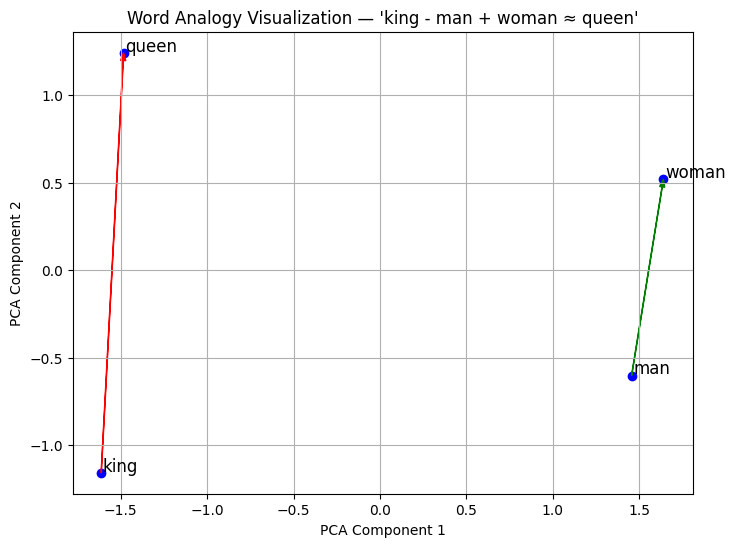

In [26]:
# 📊 Visualization: Word2Vec analogy plot using PCA

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select key words for visualization
words = ['king', 'queen', 'man', 'woman']

# Retrieve their 300-D embeddings from the model
vectors = np.array([wv[word] for word in words])

# Reduce dimensionality to 2D for plotting using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='blue')

# Annotate each point with its corresponding word
for i, word in enumerate(words):
    plt.annotate(word, xy=(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1] + 0.01), fontsize=12)

# Draw arrows showing analogical direction (man→woman and king→queen)
plt.arrow(reduced_vectors[2, 0], reduced_vectors[2, 1],
          reduced_vectors[3, 0] - reduced_vectors[2, 0],
          reduced_vectors[3, 1] - reduced_vectors[2, 1],
          color='green', width=0.0015, head_width=0.03, length_includes_head=True)

plt.arrow(reduced_vectors[0, 0], reduced_vectors[0, 1],
          reduced_vectors[1, 0] - reduced_vectors[0, 0],
          reduced_vectors[1, 1] - reduced_vectors[0, 1],
          color='red', width=0.0015, head_width=0.03, length_includes_head=True)

plt.title("Word Analogy Visualization — 'king - man + woman ≈ queen'")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


✅ **Interpretation:**

In the 2D PCA projection:

- The **red arrow (king → queen)** and the **green arrow (man → woman)** are roughly **parallel**.
- This confirms that both relationships represent the same underlying **semantic transformation** (male → female).

Geometrically:
$$
\overrightarrow{\text{man→woman}} \parallel \overrightarrow{\text{king→queen}}
$$

This shows that:
- The direction between “man” and “woman” captures **gender semantics**.  
- The same directional relationship applies to other pairs like *(actor, actress)* or *(prince, princess)*.

---

### 🧩 Summary

| Concept | Representation |
|----------|----------------|
| **Parallel Arrows** | Indicate consistent semantic transformations |
| **Cluster Proximity** | Semantically similar words lie near each other |
| **2D PCA Projection** | Visual simplification of 300-D embedding space |
| **Key Takeaway** | Word2Vec embeddings are geometrically interpretable |

---

✅ *This geometric visualization demonstrates that meaning and relationships are preserved as consistent vector directions in the embedding space.*
